# 【Quantum Native Dojo】QulacsでVQEを実装してみた【5-1】
元の解説ページ：https://dojo.qulacs.org/ja/latest/notebooks/5.1_variational_quantum_eigensolver.html

## モジュールのインポート

In [1]:
from qulacs import Observable
from qulacs import QuantumState, QuantumCircuit
from qulacs.gate import RX, RZ, CNOT
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 変分回路の作成

In [2]:
def make_ansatz_circuit(phi, n_bits):
    circuit = QuantumCircuit(n_bits)
    circuit.add_gate(RX(0, phi[0]))
    circuit.add_gate(RZ(0, phi[1]))
    circuit.add_gate(RX(1, phi[2]))
    circuit.add_gate(RZ(1, phi[3]))
    circuit.add_gate(CNOT(0, 1))
    circuit.add_gate(RX(1, phi[4]))
    circuit.add_gate(RZ(1, phi[5]))
    return circuit

## ハミルトニアンの作成

In [3]:
hamiltonian = [(-3.8505/2, ""),  \
               (-0.2288/2, "X 1"), \
               (-1.0466/2, "Z 1"),\
               (-0.2288/2, "X 0"), \
               (0.2613/2,  "X 0 X 1"), \
               (0.2288/2,  "X 0 Z 1"), \
               (-1.0466/2,  "Z 0"), \
               (0.2288/2,  "Z 0 X 1"), \
               (0.2356/2,  "Z 0 Z 1")]

In [4]:
n_bits = 2
observable = Observable(n_bits)
for (coef, Pauli_string) in  hamiltonian :
    observable.add_operator(coef, Pauli_string)

## コスト関数の作成

In [5]:
def cost(phi):
    state = QuantumState(n_bits)
    state.set_zero_state()
    circuit = make_ansatz_circuit(phi, n_bits)
    circuit.update_quantum_state(state)
    return observable.get_expectation_value(state)

def callback(phi):
    global cost_val
    cost_val.append(cost(phi))

## 最適化
同じ計算を100回行いその平均値を出力しています。  
グラフは最後のiterationの結果だけを表示しています。

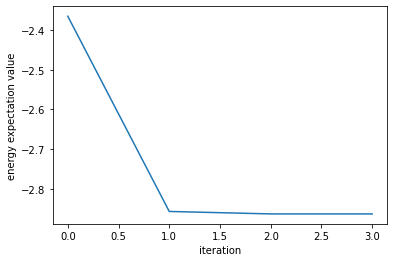

Exact Energy:  -2.8626207640766816
VQE Energy: -2.8624166416549484


In [6]:
n_params = 6
np.random.seed(1111)
n_iter = 100
energy_list = []
for _ in range(n_iter):  
    cost_val = []
    phi = np.random.random(n_params)
    callback(phi)
    res = minimize(cost, phi, method='Powell', callback=callback)
    energy_list.append(cost(res.x))

plt.plot(cost_val)
plt.xlabel("iteration")
plt.ylabel("energy expectation value")
plt.show()

print("Exact Energy: ", -2.8626207640766816)
print("VQE Energy: {}".format(np.mean(energy_list)))

# 計算結果にノイズが入った場合

In [7]:
def cost_noise(phi):
    state = QuantumState(n_bits)
    state.set_zero_state()
    circuit = make_ansatz_circuit(phi, n_bits)
    circuit.update_quantum_state(state)
    return observable.get_expectation_value(state) + np.random.normal(0, 0.01)

def callback_noise(phi):
    global cost_val
    cost_val.append(cost_noise(phi))

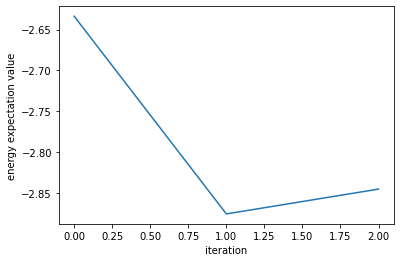

Exact Energy:  -2.8626207640766816
VQE Energy: -2.850086422671339


In [8]:
n_params = 6
np.random.seed(1111)
n_iter = 100
energy_list = []
for _ in range(n_iter):  
    cost_val = []
    phi = np.random.random(n_params)
    callback_noise(phi)
    res = minimize(cost_noise, phi, method='Powell', callback=callback_noise)
    energy_list.append(cost_noise(res.x))

plt.plot(cost_val)
plt.xlabel("iteration")
plt.ylabel("energy expectation value")
plt.show()

print("Exact Energy: ", -2.8626207640766816)
print("VQE Energy: {}".format(np.mean(energy_list)))

# 回路のパラメータを増やした場合

In [9]:
def make_ansatz_circuit(phi, n_bits):
    circuit = QuantumCircuit(n_bits)
    circuit.add_gate(RX(0, phi[0]))
    circuit.add_gate(RZ(0, phi[1]))
    circuit.add_gate(RX(1, phi[2]))
    circuit.add_gate(RZ(1, phi[3]))
    circuit.add_gate(CNOT(0, 1))
    circuit.add_gate(RX(1, phi[4]))
    circuit.add_gate(RZ(1, phi[5]))
    circuit.add_gate(RX(0, phi[6]))
    circuit.add_gate(RZ(0, phi[7]))
    circuit.add_gate(CNOT(0, 1))
    return circuit

## ノイズなし

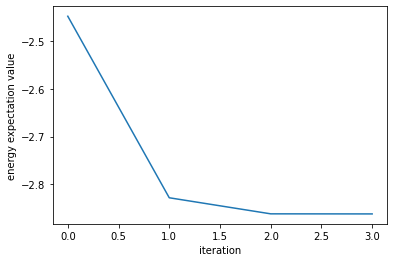

Exact Energy:  -2.8626207640766816
VQE Energy: -2.8626194809589203


In [10]:
n_params = 8
np.random.seed(1111)
n_iter = 100
energy_list = []
for _ in range(n_iter):  
    cost_val = []
    phi = np.random.random(n_params)
    callback(phi)
    res = minimize(cost, phi, method='Powell', callback=callback)
    energy_list.append(cost(res.x))

plt.plot(cost_val)
plt.xlabel("iteration")
plt.ylabel("energy expectation value")
plt.show()

print("Exact Energy: ", -2.8626207640766816)
print("VQE Energy: {}".format(np.mean(energy_list)))

## ノイズあり

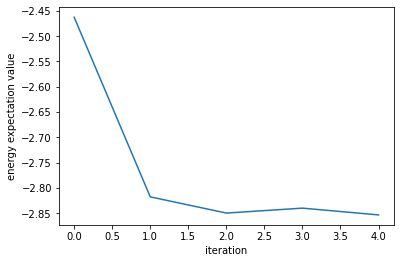

Exact Energy:  -2.8626207640766816
VQE Energy: -2.8457532192348656


In [11]:
n_params = 8
np.random.seed(1111)
n_iter = 100
energy_list = []
for _ in range(n_iter):  
    cost_val = []
    phi = np.random.random(n_params)
    callback_noise(phi)
    res = minimize(cost_noise, phi, method='Powell', callback=callback_noise)
    energy_list.append(cost_noise(res.x))

plt.plot(cost_val)
plt.xlabel("iteration")
plt.ylabel("energy expectation value")
plt.show()

print("Exact Energy: ", -2.8626207640766816)
print("VQE Energy: {}".format(np.mean(energy_list)))

## CNOTゲートなし、ノイズなし

In [12]:
def make_ansatz_circuit(phi, n_bits):
    circuit = QuantumCircuit(n_bits)
    circuit.add_gate(RX(0, phi[0]))
    circuit.add_gate(RZ(0, phi[1]))
    circuit.add_gate(RX(1, phi[2]))
    circuit.add_gate(RZ(1, phi[3]))
    circuit.add_gate(RX(1, phi[4]))
    circuit.add_gate(RZ(1, phi[5]))
    return circuit

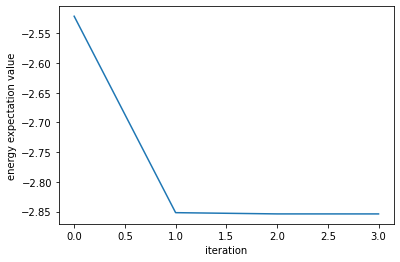

Exact Energy:  -2.8626207640766816
VQE Energy: -2.85404959554127


In [13]:
n_params = 6
np.random.seed(1111)
n_iter = 100
energy_list = []
for _ in range(n_iter):  
    cost_val = []
    phi = np.random.random(n_params)
    callback(phi)
    res = minimize(cost, phi, method='Powell', callback=callback)
    energy_list.append(cost(res.x))

plt.plot(cost_val)
plt.xlabel("iteration")
plt.ylabel("energy expectation value")
plt.show()

print("Exact Energy: ", -2.8626207640766816)
print("VQE Energy: {}".format(np.mean(energy_list)))